# Computational Physics 

## Radioactive Decay

#### By Muhammad Arief Mulyana
#### NPM: 140310220048
#### Computational physics (Fisika komputasi)

1. Uranium Radioactive Decay

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sp
import time

Time for calculation : 0.012993335723876953


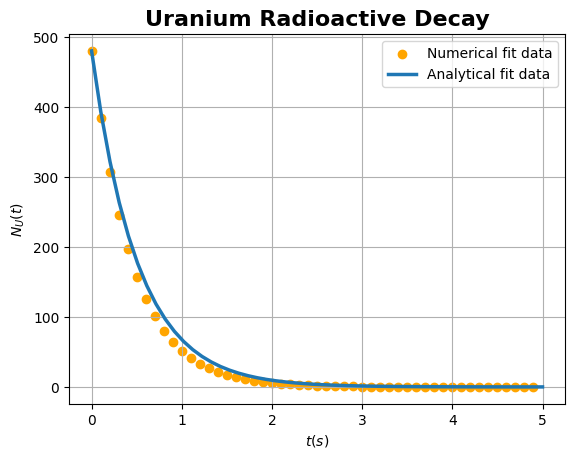

0.012993335723876953


In [2]:
#Euler approximation method for uranium decay

tmin = 0
tmax = 5
tau = 0.5
dt = 0.1
Nstep = np.uint8((tmax-tmin)/dt)
t = np.zeros(Nstep)

NU = np.zeros(Nstep)
NU[0] = 480
t0 = time.time()

for ii in range(0, Nstep-1):
    NU[ii+1] = NU[ii] - (NU[ii]/tau)*dt  
    t[ii+1] = t[ii] + dt

#For analytical value
Ngrid = 480
NU0 = 480
t_a = np.linspace(tmin, tmax)
NU_a = NU0*np.exp(-t/tau)

tn = time.time()
print("Time for calculation :", tn-t0)

plt.scatter(t, NU, color='orange', label = 'Numerical fit data')
plt.plot(t_a, NU_a, label='Analytical fit data', linewidth='2.5')
plt.title("Uranium Radioactive Decay", fontweight = 'bold', fontsize = '16')
plt.xlabel('$t(s)$')
plt.ylabel('$N_U(t)$')
plt.legend()
plt.grid()
plt.show()

print(tn-t0)

2. Assignment of Giordano problem 13-14 in number 6 when $\frac{dN}{dt} = aN$  or  $\frac{dN}{dt} = aN - bN^2, \, with \,\,\, b = 0$

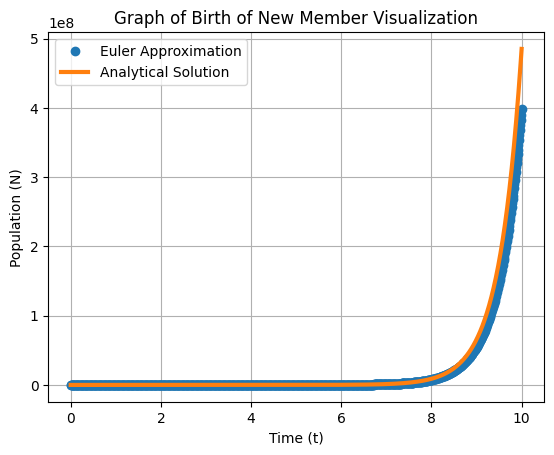

In [3]:
# Define the function for the differential equation
def f(N, a):
  return a * N  # Simplified equation

# Set initial conditions
N0 = 1  # Initial population
a = 2  # Growth rate
t_end = 10  # End time
dt = 0.01  # Time step

# Initialize time and population arrays
t = np.arange(0, t_end + dt, dt)
N = np.zeros(len(t))
N[0] = N0  # Initial population

# Perform Euler approximation
for i in range(1, len(t)):
  N[i] = N[i-1] + f(N[i-1], a) * dt

# Plot the results
plt.plot(t, N, 'o', label="Euler Approximation")

# Analytical solution (for comparison)
def analytical_solution(N0, a, t):
  return N0 * np.exp(a * t)  # Exponential growth

plt.plot(t, analytical_solution(N0, a, t), label="Analytical Solution", linewidth='3')

plt.xlabel("Time (t)")
plt.ylabel("Population (N)")
plt.legend()
plt.grid(True)
plt.title("Graph of Birth of New Member Visualization")
plt.show()


3. Assignment of Giordano problem 13-14 in number 6 when $\frac{dN}{dt} = aN - bN^2$ with a = 10 and b = 3

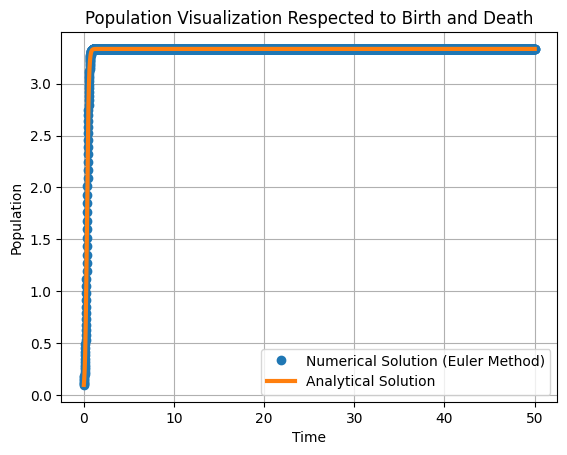

In [4]:
# Define parameters
a = 10  # Growth rate
b = 3  # Decay rate

# Initial condition
N0 = 0.1  # Initial population
t0 = 0.0  # Initial time

# Time parameters
t_final = 50.0  # Final time
dt = 0.01  # Time step size

# Analytical solution
def analytical_solution(t):
     return -a * N0 * np.exp(a * t) / (b * N0 * (1 - np.exp(a * t)) - 10)

# Euler method for numerical solution
def euler_method(N0, t0, t_final, dt):
    N_values = [N0]
    t_values = [t0]
    N = N0
    t = t0
    while t < t_final:
        dNdt = a * N - b * N**2
        N += dNdt * dt
        t += dt
        N_values.append(N)
        t_values.append(t)
    return np.array(t_values), np.array(N_values)

# Compute numerical solution
t_values, N_numerical = euler_method(N0, t0, t_final, dt)

# Compute analytical solution
N_analytical = analytical_solution(t_values)

# Plot results
plt.plot(t_values, N_numerical,'o', label='Numerical Solution (Euler Method)')
plt.plot(t_values, N_analytical, label='Analytical Solution', linewidth='3')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Visualization Respected to Birth and Death')
plt.legend()
plt.grid()
plt.show()


4. Giordano problem 13-14 number 3, solving $\frac{dv}{dt} = a - bv$

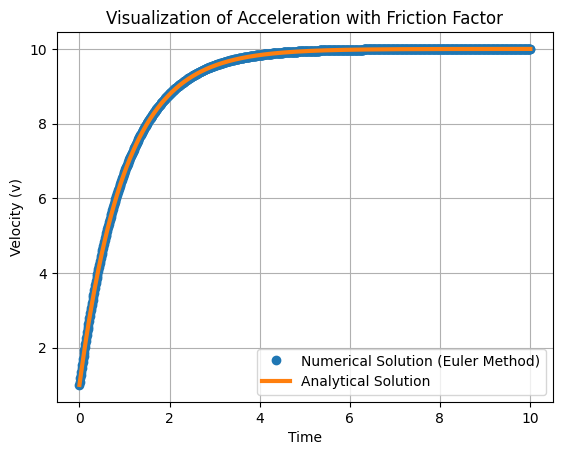

In [5]:
# Define parameters
a = 10  # Constant coefficient
b = 1  # Constant coefficient

# Initial condition
v0 = 1.0  # Initial velocity
t0 = 0.0  # Initial time

# Time parameters
t_final = 10.0  # Final time
dt = 0.01  # Time step size

# Euler method for numerical solution
def euler_method(a, b, v0, t0, t_final, dt):
    v_values = [v0]
    t_values = [t0]
    v = v0
    t = t0
    while t < t_final:
        dvdt = a - b * v
        v += dvdt * dt
        t += dt
        v_values.append(v)
        t_values.append(t)
    return np.array(t_values), np.array(v_values)

# Analytical solution
def analytical_solution(a, b, v0, t_values):
    v_analytical = (a / b) * (1 - np.exp(-b * t_values)) + v0 * np.exp(-b * t_values)
    return v_analytical

# Compute numerical solution
t_values, v_values = euler_method(a, b, v0, t0, t_final, dt)

# Compute analytical solution
v_analytical = analytical_solution(a, b, v0, t_values)

# Plot the result
plt.plot(t_values, v_values, 'o', label='Numerical Solution (Euler Method)')
plt.plot(t_values, v_analytical, label='Analytical Solution', linewidth='3')
plt.xlabel('Time')
plt.ylabel('Velocity (v)')
plt.title('Visualization of Acceleration with Friction Factor')
plt.legend()
plt.grid(True)
plt.show()

5. Problem from my lecturer (Dr. Budi Adiperdana), solving $\frac{dN_A}{dt} = - \frac{N_A}{\tau_A}$, $\frac{dN_B}{dt} =  \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}$, and $\frac{dN_C}{dt} = \frac{N_A}{\tau_A} + \frac{N_B}{\tau_B} - \frac{N_C}{\tau_C}$


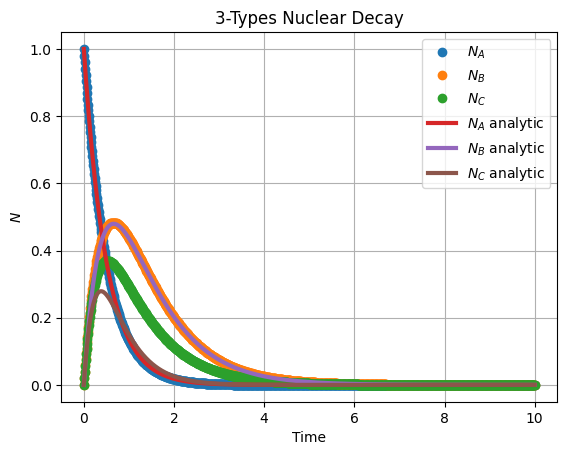

In [6]:
# Define parameters and initial conditions
tau_A = 0.5
tau_B = 0.9
tau_C = tau_A-0.2

N_A0 = 1.0
N_B0 = 0.0
N_C0 = 0.0

t0 = 0.0
t_final = 10.0
dt = 0.01

# Implement Euler method for numerical solution
def euler_method(N_A0, N_B0, N_C0, tau_A, tau_B, tau_C, t0, t_final, dt):
    num_steps = int((t_final - t0) / dt)
    t_values = np.linspace(t0, t_final, num_steps + 1)
    N_A_values = np.zeros(num_steps + 1)
    N_B_values = np.zeros(num_steps + 1)
    N_C_values = np.zeros(num_steps + 1)
    
    N_A = N_A0
    N_B = N_B0
    N_C = N_C0
    
    for i in range(num_steps + 1):
        N_A_values[i] = N_A
        N_B_values[i] = N_B
        N_C_values[i] = N_C
        
        dN_A_dt = -N_A / tau_A
        dN_B_dt = N_A / tau_A - N_B / tau_B
        dN_C_dt = N_A / tau_A + N_B / tau_B - N_C / tau_C
        
        N_A += dN_A_dt * dt
        N_B += dN_B_dt * dt
        N_C += dN_C_dt * dt
        
    return t_values, N_A_values, N_B_values, N_C_values

# Compute numerical solution using Euler method
t_values, N_A_values, N_B_values, N_C_values = euler_method(N_A0, N_B0, N_C0, tau_A, tau_B, tau_C, t0, t_final, dt)

#Analytical Solution

N_A_analytical = N_A0 * np.exp(-t/tau_A)
N_B_analytical = N_B0 * np.exp(-t/tau_B) + (tau_B/(tau_A - tau_B)) * N_A0 * (np.exp(-t/tau_A) - np.exp(-t/tau_B))
N_C_analytical = N_C0 * np.exp(-t/tau_C) + (tau_C/(tau_A - tau_C)) * N_A0 * (np.exp(-t/tau_A) - np.exp(-t/tau_C)) + (tau_C/(tau_B - tau_C)) * N_B0 * (np.exp(-t/tau_B) - np.exp(-t/tau_C))

# Plot the results
plt.plot(t_values, N_A_values, 'o', label='$N_A$')
plt.plot(t_values, N_B_values, 'o', label='$N_B$')
plt.plot(t_values, N_C_values, 'o', label='$N_C$')
plt.plot(t_values, N_A_analytical, label='$N_A$ analytic', linewidth='3')
plt.plot(t_values, N_B_analytical, label='$N_B$ analytic', linewidth='3')
plt.plot(t_values, N_C_analytical, label='$N_C$ analytic', linewidth = '3')
plt.xlabel('Time')
plt.ylabel('$N$')
plt.title('3-Types Nuclear Decay')
plt.legend()
plt.grid(True)
plt.show()

### References

 Giordano, N. J., & Nakanishi, H. (2006). Computational Physics (2nd ed.). Pearson Education.